In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
!wget --header="Host: doc-08-ao-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_os3ftn4tgjvd1o3qu47r0sa1m0inhkii_nonce=5c8bf1spqeejc" --header="Connection: keep-alive" "https://doc-08-ao-docs.googleusercontent.com/docs/securesc/kd8bgoddf9l2da66opbpq16cp4ioi5uj/b1u7euukapvin540ogn96dlicg45fmu8/1650347775000/06629147635963609455/06611803433127174159/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&ax=ACxEAsaJxRp4NS80krYIqa_ErD_RIWGVgIkmowqS6Wyrdjl5hk1gIWELztKQmHKAIn-NSSacIKBCKXC_XDmq5n9BKcJlO-cfv4Ez6d4p-w8vbOnC4D76Q3hIMD6E0F9u9Bnx2Wn6rlMLS5lAdrjirDzJYqYEDSFolRxuks0f7u_X2EYQLcy7wocIAQMqs5fbEYX-2WjbupmtErovr3Hv69pEjcI9oOJqWuzkuQNc9mEOZm-s3Kv0SWCI6a6eMYQj9da2URstTI7ScBgIc4I6ErSdGJc94YYQsfbErZtoak2aeVICKH_5HRStQQKJD7GB9i26FrfP5CHKCuhb4rCVNTgqHm6e6OiNH_6W_RdXZzIfRMdjP_Qw5wpf3FQiYVeWmz_TNQ5nL0ixcPk-MUVpY9edqnnIG5JiceS8OzEjKtKcP6MHeRaIssZxEsNjx07IOyBgG4DYFAyxrq7b94TSxxovsOKfw7mCccEB46yUfwH7IXCRgIFcuwJISJIAzEhnlJ1ZSL1HMRtfRjVXVCa7EEZfNlW-8c7Em_0gBi8Vsd21IOUzvEU5V-7cPvvqpJ4vfrIwh4VhXH0CltKB3JmPufF5waBx9Zrmi6nJxSM0pwIk1NqdE94hSUWY_6HkMe5_RUyPF2c9VOrPAxSuMsH9q_y7nux6A_OzDrhTlYNyKDFRYq7eRnOPTNSwXLNfGz8XjHyGXkVF6mMKLwvozCObTcehkJ-DWc2CfUJcyPBhtHBBkhAyhD-L3u0&authuser=0&nonce=5c8bf1spqeejc&user=06611803433127174159&hash=ts0agcs3n6p9pivl7bjcvop4jmed9t4e" -c -O 'storage_sample_stage4.h5'

--2022-04-19 05:56:45--  https://doc-08-ao-docs.googleusercontent.com/docs/securesc/kd8bgoddf9l2da66opbpq16cp4ioi5uj/b1u7euukapvin540ogn96dlicg45fmu8/1650347775000/06629147635963609455/06611803433127174159/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&ax=ACxEAsaJxRp4NS80krYIqa_ErD_RIWGVgIkmowqS6Wyrdjl5hk1gIWELztKQmHKAIn-NSSacIKBCKXC_XDmq5n9BKcJlO-cfv4Ez6d4p-w8vbOnC4D76Q3hIMD6E0F9u9Bnx2Wn6rlMLS5lAdrjirDzJYqYEDSFolRxuks0f7u_X2EYQLcy7wocIAQMqs5fbEYX-2WjbupmtErovr3Hv69pEjcI9oOJqWuzkuQNc9mEOZm-s3Kv0SWCI6a6eMYQj9da2URstTI7ScBgIc4I6ErSdGJc94YYQsfbErZtoak2aeVICKH_5HRStQQKJD7GB9i26FrfP5CHKCuhb4rCVNTgqHm6e6OiNH_6W_RdXZzIfRMdjP_Qw5wpf3FQiYVeWmz_TNQ5nL0ixcPk-MUVpY9edqnnIG5JiceS8OzEjKtKcP6MHeRaIssZxEsNjx07IOyBgG4DYFAyxrq7b94TSxxovsOKfw7mCccEB46yUfwH7IXCRgIFcuwJISJIAzEhnlJ1ZSL1HMRtfRjVXVCa7EEZfNlW-8c7Em_0gBi8Vsd21IOUzvEU5V-7cPvvqpJ4vfrIwh4VhXH0CltKB3JmPufF5waBx9Zrmi6nJxSM0pwIk1NqdE94hSUWY_6HkMe5_RUyPF2c9VOrPAxSuMsH9q_y7nux6A_OzDrhTlYNyKDFRYq7eRnOPTNSwXLNfGz8XjHyGXkVF6mMKLwvozCObTcehkJ-DWc2CfUJcyPBhtH

In [ ]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
df_final_test.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
!wget --header="Host: doc-00-ao-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_os3ftn4tgjvd1o3qu47r0sa1m0inhkii_nonce=t149gnj6fkase" --header="Connection: keep-alive" "https://doc-00-ao-docs.googleusercontent.com/docs/securesc/kd8bgoddf9l2da66opbpq16cp4ioi5uj/b2vgcr3nogagsv3e1pg8jn3ij4vt18u7/1650348450000/06629147635963609455/06611803433127174159/1XLHsIRXKLx9TA9nuC1SS7JDkLyRVmo69?e=download&ax=ACxEAsbWY6rhEWtAIfwaP6Q5koCWJkF0jF9NxA6c3UXRgbSq4GN9brpgTqOicYdPcByJFJL5TI9VCSlm0_9IOw6kZ9QdOrZIr_5RhGjaorlNOcX19bbbgXFnw6bbF5jBg7KRz2BKmmxF8KAB6EasEwDVgyg0OjhkTd2qbzBsQvJ2y2PApFKnlJuRf4Dq2SEbN2WGRGG3XoVliBQxPH_flo30mMxm42Pn73Vu-VA_OCBQz2oNFs6hBlZa6W3JNXnFCOTmjk5koyoj4Lw2qLDMweeYDtNmCZveRHdH_6mTdXj8dk_6FxzwDTQVgYyloHJPYcYmipa-3LuWUMq3ZlI9dyuCHOxIXaIy1tx_E8GGgDZiP6XLDkwxO5cdWwBRSPiV6chJfnHQHAGinnCzU6AX9jSwu6hqKOE-HFt0ZAXYMFfPtN2ufyge79Bj1nvTOs7SiDGsDFr2hYdKuV527Qo4TTppp3B927AIlOWVpBsj4om0xNDFUFdffrJ6_KmFMUVc-8mKbjfA3-S4bO8NVkU4tJzzRGVBVi0NGmCAiZ8iPD8rIqoNt8JxLsy9X3Lf3dYmbNrZylnsKnJYWnSASwSN-Q9ShTFEpLqF5lBtKyCGoO1pInwYKd1O5QTVwlk4UeC5Y7v8wBVjuuNmV72AhsnuzwuS_dmr6KaEVLBWqJZ7vard0R8DAOEvc8MwPQ9yyEmqSSDyYFZ3dZXHnaxBk9gnNT8yk6Xa1583_3SfaXPgIlLtxbAyMpxargc&authuser=0&nonce=t149gnj6fkase&user=06611803433127174159&hash=ianpbfopg7hubsh0drlkpcrokj7ic7rm" -c -O 'train_pos_after_eda.csv'

--2022-04-19 06:08:08--  https://doc-00-ao-docs.googleusercontent.com/docs/securesc/kd8bgoddf9l2da66opbpq16cp4ioi5uj/b2vgcr3nogagsv3e1pg8jn3ij4vt18u7/1650348450000/06629147635963609455/06611803433127174159/1XLHsIRXKLx9TA9nuC1SS7JDkLyRVmo69?e=download&ax=ACxEAsbWY6rhEWtAIfwaP6Q5koCWJkF0jF9NxA6c3UXRgbSq4GN9brpgTqOicYdPcByJFJL5TI9VCSlm0_9IOw6kZ9QdOrZIr_5RhGjaorlNOcX19bbbgXFnw6bbF5jBg7KRz2BKmmxF8KAB6EasEwDVgyg0OjhkTd2qbzBsQvJ2y2PApFKnlJuRf4Dq2SEbN2WGRGG3XoVliBQxPH_flo30mMxm42Pn73Vu-VA_OCBQz2oNFs6hBlZa6W3JNXnFCOTmjk5koyoj4Lw2qLDMweeYDtNmCZveRHdH_6mTdXj8dk_6FxzwDTQVgYyloHJPYcYmipa-3LuWUMq3ZlI9dyuCHOxIXaIy1tx_E8GGgDZiP6XLDkwxO5cdWwBRSPiV6chJfnHQHAGinnCzU6AX9jSwu6hqKOE-HFt0ZAXYMFfPtN2ufyge79Bj1nvTOs7SiDGsDFr2hYdKuV527Qo4TTppp3B927AIlOWVpBsj4om0xNDFUFdffrJ6_KmFMUVc-8mKbjfA3-S4bO8NVkU4tJzzRGVBVi0NGmCAiZ8iPD8rIqoNt8JxLsy9X3Lf3dYmbNrZylnsKnJYWnSASwSN-Q9ShTFEpLqF5lBtKyCGoO1pInwYKd1O5QTVwlk4UeC5Y7v8wBVjuuNmV72AhsnuzwuS_dmr6KaEVLBWqJZ7vard0R8DAOEvc8MwPQ9yyEmqSSDyYFZ3dZXHnaxBk9gnNT8yk6Xa1583_3SfaXPgIl

In [ ]:
 train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

Adding num_followers_d

In [ ]:
def compute_features_stage1(df_final):
     
    num_followers_d=[]  
    for i,row in df_final.iterrows():#https://www.codegrepper.com/code-examples/python/frameworks/file-path-in-python/for+index+row+in+df.iterrows%28%29  
        try:
            d1=set(train_graph.predecessors(row['destination_node']))        
        except:          
            d1 = set()         
        num_followers_d.append(len(d1))
    return  num_followers_d

In [ ]:
df_final_train['num_followers_d']=compute_features_stage1(df_final_train)
df_final_test['num_followers_d']=compute_features_stage1(df_final_test)

Preferential attachment

In [ ]:
def preferential_attachment(df_final):

  PF_source=df_final['num_followers_s']*df_final['num_followers_d']
  PF_destination=df_final['num_followees_s']*df_final['num_followees_d']

  return PF_source,PF_destination


In [ ]:
df_final_train['PF_source'],df_final_train['PF_destn']=preferential_attachment(df_final_train)
df_final_test['PF_source'],df_final_test['PF_destn']=preferential_attachment(df_final_test)

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'num_followers_d', 'PF_source', 'PF_destn'],
      dtype='object')

SVD_DOT

In [ ]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [ ]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [ ]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [ ]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [ ]:
def svd_dot(df_final):
  dot_u=[]
  dot_v=[]
  for i,row in df_final.iterrows():

    a=svd(row['source_node'],U)
    b=svd(row['destination_node'],U)
    dot_u.append(np.dot(a,b))

    c=svd(row['source_node'],V.T)
    d=svd(row['destination_node'],V.T)
    dot_v.append(np.dot(c,d))

  return dot_u,dot_v

In [ ]:
df_final_train['svd_dot_u'],df_final_train['svd_dot_v']=svd_dot(df_final_train)
df_final_test['svd_dot_u'],df_final_test['svd_dot_v']=svd_dot(df_final_test)

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [ ]:
df_final_train.columns.shape

(53,)

In [ ]:
df_final_test.columns.shape

(53,)

#Models

Random Forest

Estimators =  10 Train Score 0.9244254074383619 test Score 0.9196767761569945
Estimators =  50 Train Score 0.9208723393127974 test Score 0.9149906479204758
Estimators =  100 Train Score 0.9222460172368764 test Score 0.9147352038026333
Estimators =  250 Train Score 0.9224333566894302 test Score 0.914778947368421
Estimators =  450 Train Score 0.9225623013881921 test Score 0.9149567523202222


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

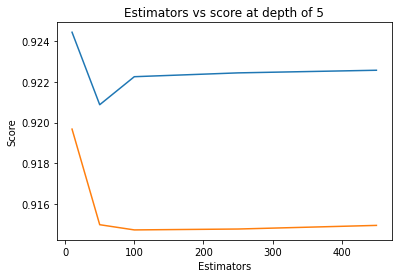

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8886100981319838 test Score 0.8638968481375358
depth =  9 Train Score 0.9546560857382447 test Score 0.9243729334709264
depth =  11 Train Score 0.9612263117315263 test Score 0.9255976137461666
depth =  15 Train Score 0.9634251509156393 test Score 0.9261829652996846
depth =  20 Train Score 0.9631597627135833 test Score 0.9258877699051784
depth =  35 Train Score 0.9629982660190434 test Score 0.9257842065427635
depth =  50 Train Score 0.9629982660190434 test Score 0.9257842065427635
depth =  70 Train Score 0.9629982660190434 test Score 0.9257842065427635
depth =  130 Train Score 0.9629982660190434 test Score 0.9257842065427635


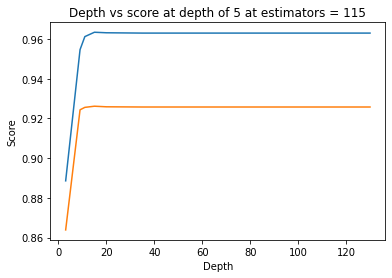

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96155984 0.96145028 0.96001142 0.96158348 0.96257622]
mean train scores [0.96196762 0.96177083 0.96019027 0.96198829 0.96329277]


In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [ ]:
clf=RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9634326995271818
Test f1 score 0.9263613991544497


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


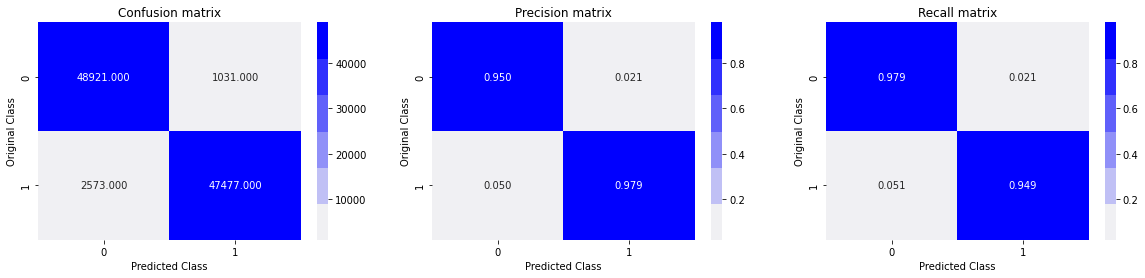

Test confusion_matrix


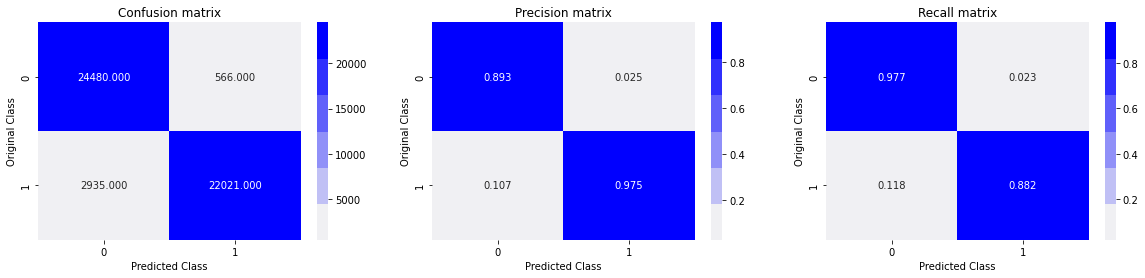

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

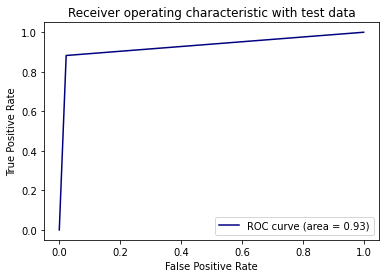

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

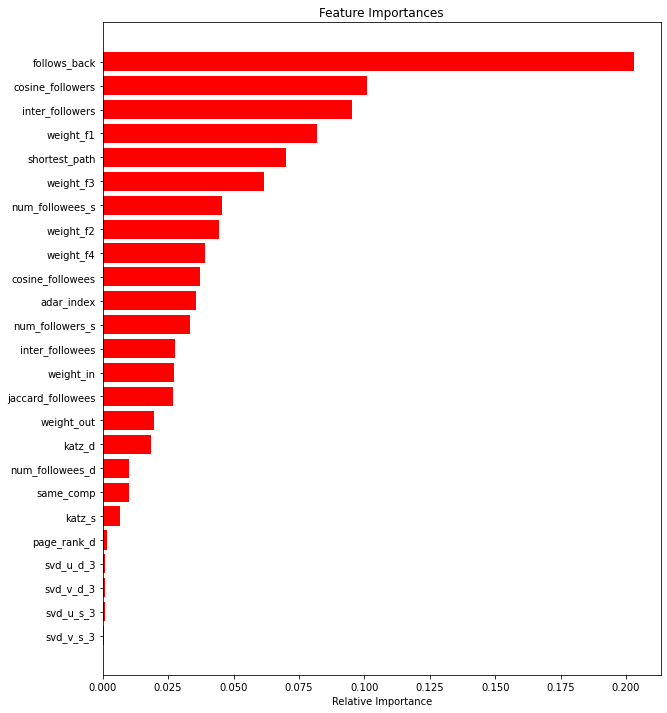

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#XG BOOST


In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"learning_rate":[0.05,0.1,0.25],
              "max_depth": sp_randint(5,8),
              "gammma": [0,0.1,0.2,0.4],
              "min_child_weight": sp_randint(1,3)}

clf =  xgb.XGBClassifier(n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=3,cv=3,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.98119745 0.97972831 0.97061367]
mean train scores [0.99697254 0.98850889 0.97114636]


In [ ]:
print(rf_random.best_estimator_)

XGBClassifier(gammma=0, learning_rate=0.25, max_depth=7, min_child_weight=2,
              n_jobs=-1)


In [ ]:
clf=xgb.XGBClassifier(gammma=0, learning_rate=0.25, max_depth=7, min_child_weight=2,
              n_jobs=-1)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9951927891837757
Test f1 score 0.92594481996344


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


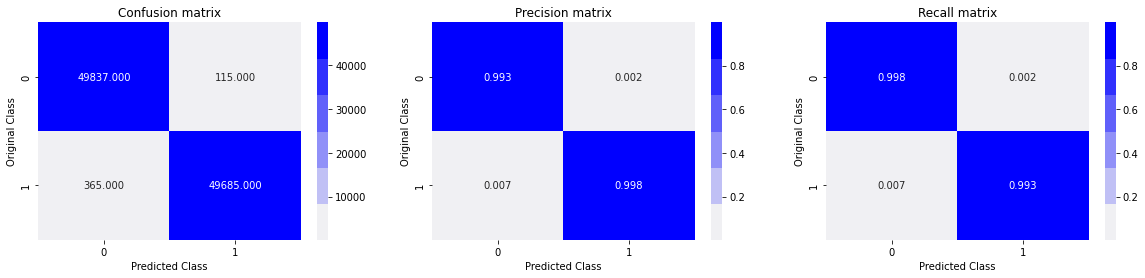

Test confusion_matrix


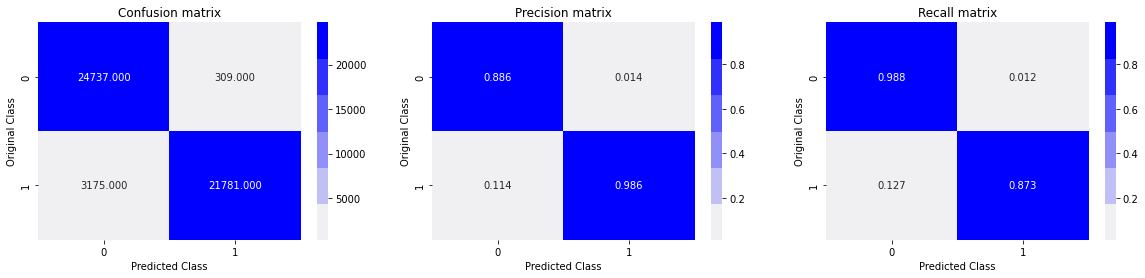

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

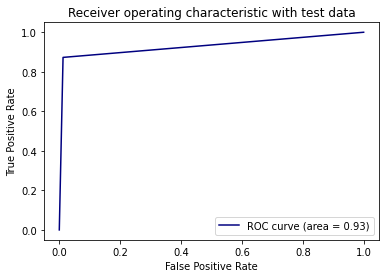

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

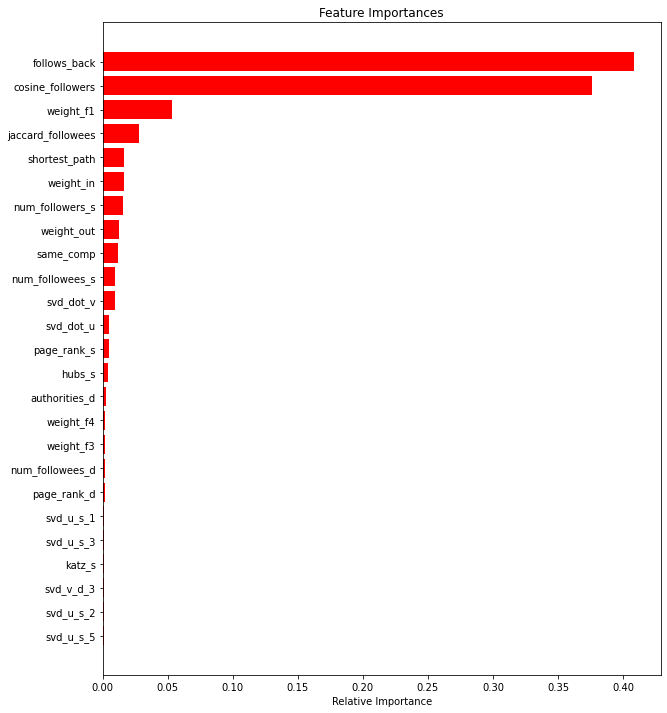

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observations-

*   Applying XGBoost classifier significantly increases the F1 score for the train data, where as for test data its almost the same
*   There is a minor difference in the train and test scores ie model might be overfitting
*  Adding the features like sv_dot_u and sv_dot_v changes the feature importances as shown in the bar plot.
*  However, the feature preferential attachment did not have a good feature importance while predicting results for the model.









